![ThermoFun logo](common/fun_long_logo-01.png)

**ThermoFun** is an open-source client that delivers thermodynamic properties of substances and reactions at the temperature and pressure of interest.

# How to do batch calculations?
The Batch class is useful for doing multiple (batch) calculations for a given list of substances, reactions, properties, and desired temperature and pressure grid. Several options to set the input and output properties units are available.

### Import ThermoFun python package 

In [1]:
import thermofun as fun

Load a database from file. The available databases for testing are found in the `databases/` folder. .

In [2]:
database = fun.Database("databases/slop98-thermofun.json")

Initialize a `batch` object using the `database` object

In [3]:
batch = fun.ThermoBatch(database)

**Important!** ThermoFun uses SI units, but the `ThermoBatch` class allows the user to set the desired units for the input and output parameters.

In [4]:
batch.setPropertiesUnits(["temperature", "pressure"],["degC","bar"])

Optional: Set significant digits (same order as the list of property symbols).

In [5]:
batch.setPropertiesDigits(["gibbs_energy","entropy", "volume",
                            "enthalpy","logKr", "temperature", "pressure"], [0, 4, 4, 4, 4, 0, 3])

Setup the list of substances or reactions and the properties you wish to calculate.

In [6]:
substances = ["Na+", "Mg+2", "Ca+2", "SiO2@"]
properties = ["gibbs_energy", "enthalpy", "entropy"]

There are different ways to define the temperatures and pressures at which the calculations should be done. One way is defining a temperature pressure pair list:

In [7]:
temperature_pressure_pairs = [[50,1000],  [150,1000], [200,1000], [250,1000], [300,1000], [350,1000], 
                              [400,1000], [450,1000], [500,1000], [550,1000], [600,1000], [650,1000], 
                              [700,1000], [800,1000], [900,1000], [1000,1000]]

To do the calculations and write the results to a CSV file:

In [8]:
batch.thermoPropertiesSubstance(temperature_pressure_pairs, substances, properties).toCSV("results.csv")

How do the results look on a plot:

In [9]:
from common.functions import plot_substances_properties_vs_temperature

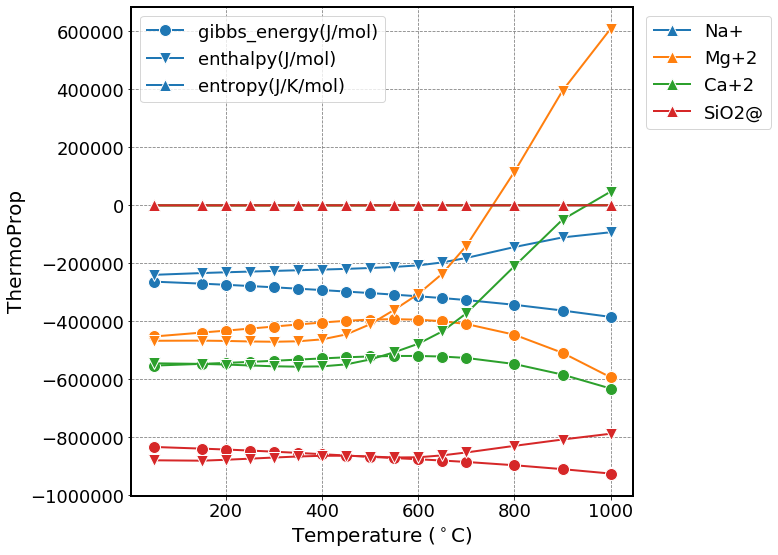

In [10]:
figure = plot_substances_properties_vs_temperature('results.csv', substances, 1000)